In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

import sys

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sklearn as sk
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error
import statsmodels.api as sm

In [2]:
podaci_s = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/dataParquet_s.parquet")
print(podaci_s)

                redna_cena  akcijska_cena  n_trgovin     kol
art datum                                                   
38  2017-01-16       0.099          0.099        425    58.0
    2018-04-08       0.100          0.100        380   403.0
39  2016-11-28       0.100          0.100        462  2504.0
40  2017-01-14       0.769          0.769        321   137.0
41  2016-01-08       1.631          1.586        176    36.0
38  2018-01-17       0.099          0.099        397    18.0
39  2017-01-19       0.100          0.100        458  3883.0
    2018-01-19       0.100          0.100        449  4024.0
40  2018-04-15       0.769          0.769        258    33.0
39  2017-05-11       0.100          0.100        462  5080.0
40  2017-04-19       0.768          0.768        294    44.0
41  2016-07-16       1.631          1.631        157    38.0
40  2017-07-15       0.769          0.769        233    90.0
38  2017-07-27       0.100          0.100        417   572.0
39  2017-05-09       0.1

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
import datetime

podaci_s['day_of_week'] = podaci_s.index.get_level_values('datum').day_name()

In [4]:
n = podaci_s.shape[0]
nule = [0]*n

In [5]:
podaci_s['Monday'] = nule
podaci_s['Tuesday'] = nule
podaci_s['Wednesday'] = nule
podaci_s['Thursday'] = nule
podaci_s['Friday'] = nule
podaci_s['Saturday'] = nule
podaci_s['Sunday'] = nule

In [6]:
for art, new_df in podaci_s.groupby(level=0):
    for index, row in new_df.iterrows():
        dan=row['day_of_week']
        podaci_s.loc[(row.name[0],row.name[1].date()),dan] = 1

In [7]:
podaci_s['Vikend'] = np.where(podaci_s['day_of_week'] == "Saturday",1,np.where(podaci_s['day_of_week'] == "Sunday",1,0))

In [8]:
podaci_sredjeni = podaci_s.rename(columns={"Vikend": "Weekend"})

In [9]:
podaci_sredjeni=podaci_sredjeni.drop('day_of_week',axis=1)

In [10]:
podaci_sredjeni.sort_index(inplace=True)

In [11]:
dataParquet_sredjeni = podaci_sredjeni.to_parquet('dataParquet_sredjeni.parquet')

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


In [12]:
X = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/dataParquet_sredjeni.parquet")

## Odvajanje podataka u testni i trening set

In [13]:
X_tr = X.loc[podaci_s.index.get_level_values('datum') <= '2018-01-01']
X_train = X_tr.drop('kol',axis=1)

X_te = X.loc[podaci_s.index.get_level_values('datum') > '2018-01-01']
X_test = X_te.drop('kol',axis=1)

y_train = X_tr['kol']
y_test = X_te['kol']

In [14]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3535, 11) (3535,)
(686, 11) (686,)


### Preprocesiranje **TRAINING** podataka

In [15]:
std_scaler = StandardScaler()

In [16]:
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train_scaled = std_scaler.transform(X_train)

### Fittamo model na podacima trening seta

In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)

In [19]:
y_train_predicted = model.predict(X_train_scaled)

In [20]:
model.score(X_train_scaled, y_train)

0.3331065590091854

In [21]:
mae = mean_absolute_error(y_train, y_train_predicted)
mae

865.3936867085807

In [22]:
mse = mean_squared_error(y_train, y_train_predicted)
mse

1669183.2829687512

### TEST 

In [23]:
X_test_scaled = std_scaler.transform(X_test)
y_test_predicted = model.predict(X_test_scaled)

In [24]:
mae = mean_absolute_error(y_test, y_test_predicted)
mae

861.6972112647825

In [25]:
mse = mean_squared_error(y_test, y_test_predicted)
mse

1655605.0164098388

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
rmse

1286.7031578456

In [27]:
koeficijenti = model.coef_
print(koeficijenti)

[-1.81381302e+03  1.66247287e+03  7.93647644e+02 -6.84191523e+15
 -6.95428716e+15 -7.05192802e+15 -7.10255103e+15 -7.05192802e+15
  6.38232374e+14  6.28169962e+14 -9.81163331e+15]


In [28]:
odsjecak = model.intercept_
print(odsjecak)

809.2602474157434


In [29]:
paramtetri_nagiba = model.get_params
print(paramtetri_nagiba)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [30]:
y_test_predicted[0:5]

array([1535.26024742, 2050.26024742, 2117.26024742, 1561.26024742,
       2040.26024742])

In [31]:
y_test[:10]

art  datum     
38   2016-01-03    100.0
     2016-01-07     97.0
     2016-01-09    541.0
     2016-01-10     94.0
     2016-01-21    337.0
     2016-02-09    186.0
     2016-02-19    232.0
     2016-02-20    397.0
     2016-02-23     53.0
     2016-02-28    137.0
Name: kol, dtype: float64

In [32]:
y_test_predicted[:10]

array([1535.26024742, 2050.26024742, 2117.26024742, 1561.26024742,
       2040.26024742, 1476.26024742, 1922.26024742, 2113.26024742,
       1518.26024742, 1535.26024742])

Text(0, 0.5, 'predviđene kolicina')

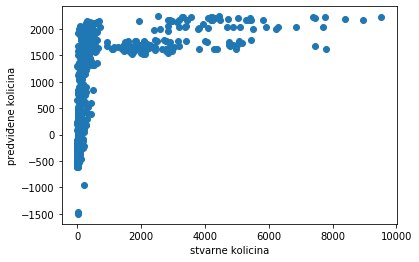

In [33]:
plt.scatter(y_test, y_test_predicted)
plt.xlabel("stvarne kolicina")
plt.ylabel("predviđene kolicina")

In [34]:
r2_score(y_test,y_test_predicted)

0.3221461112221097

In [35]:
rmse = np.sqrt(mean_squared_error(y_test,y_test_predicted))
print(rmse)

1286.7031578456
